# 学期内曾在tensorflow入门时使用其搭建神经网络，这次想加深自己的理解，抛弃tensorflow，只使用numpy等辅助

In [11]:
# 只是想用里面的数据集
import tensorflow as tf
from tensorflow import keras
# 导入数据
def load_data():
    fashion_mnist = keras.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    return train_images, train_labels, test_images, test_labels

In [54]:
tr_images, tr_labels, te_images, te_labels = load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 训练集60000个图像，每个图象为28*28像素
# 测试集包含10000个图像
print(tr_images.shape, tr_labels.shape, te_images.shape, te_labels.shape)
tr_imges[1].shape

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


(28, 28)

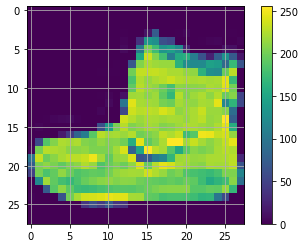

In [53]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(tr_images[0])
plt.colorbar()
# 生成网格
plt.grid()
plt.show()

In [44]:
# 归一化
tr_images = tr_images/255.0
te_images = te_images/255.0

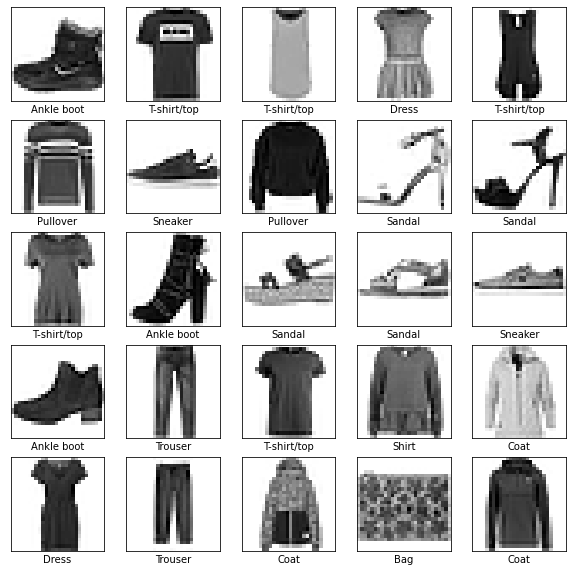

In [50]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
#     只显示灰度
    plt.imshow(tr_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[tr_labels[i]])

**正式开始搭建网络**

神经网络的输入，每个数字都是0~1
input_dim:28*28=784
reg：0.3
nums_classes:10

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
# 先定义好需要的基本量
dimensions = [28*28, ]

In [38]:
def tanh(x):
    return np.tanh(x)

def softmax(x):
    '''都减去x中最大的那个数，防止产生指数爆炸
    相当于分子分母同除以一个数，所以不会对结果造成影响'''
    exp = np.exp(x-x.max())
    return exp/exp.sum()

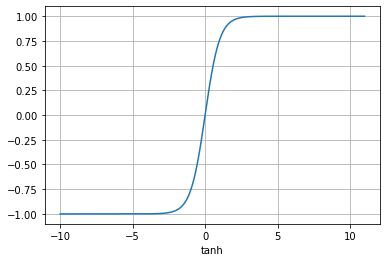

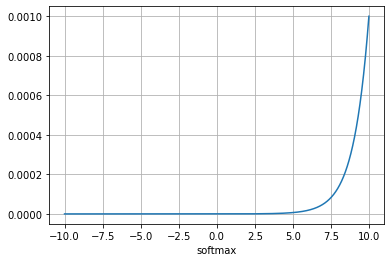

In [40]:
# 绘制函数图像
def drow_tanh(ranges):
    plt.figure()
    x = ranges
    y = tanh(x)
    plt.grid()
    plt.xlabel('tanh')
    plt.plot(x ,y)

def drow_softmax(ranges):
    plt.figure()
    x = ranges
    y = softmax(x)
    plt.grid()
    plt.xlabel('softmax')
    plt.plot(x, y)

drow_tanh(np.arange(-10,11,0.001))
drow_softmax(np.arange(-10,10,0.001))

In [ ]:
class Network(object):
    def __init__(self,
                 hidden_dims,
                 input_dim=784
                 reg=0.3,
                 nums_classes=10,
                dtype=np.float32):
        self.num_layers = len(hidden_dims)
        self.hidden_dims = hiddendims
        self.input_dim = 2352
        self.reg = reg
        self.num_classes = nums_classes
        
        self.params = {'W':[], 'b':[]}
        '''随机生成参数W、b'''
        D_in, D_out = self.input_dim, self.hidden_dims[0]
        for i in range(self.num_layers + 1):
            self.params['W'].append(np.random.normal(scale=1e-3, size=(D_in, D_out)).astype(dtype))
            self.params['b'].append(np.zeros((D_out, )).astype(dtype))